In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [2]:
archivo = 'https://raw.githubusercontent.com/NgoQuocBao1010/Exercise-Correction/main/core/plank_model/train.csv'

ds = pd.read_csv(archivo)

In [12]:
archivo = 'https://raw.githubusercontent.com/NgoQuocBao1010/Exercise-Correction/main/core/plank_model/test.csv'

ds_test = pd.read_csv(archivo)

ds

,label,nose_x,nose_y,nose_z,nose_v,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_shoulder_v,right_shoulder_x,...,right_heel_z,right_heel_v,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_v,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_v
0,1,0.792141,0.585212,-0.067640,0.999518,0.682632,0.539670,0.270455,0.996880,0.688922,...,-0.077094,0.957863,0.098083,0.716431,0.186286,0.685353,0.084355,0.724885,-0.230562,0.952622
1,1,0.792153,0.585208,-0.067657,0.999518,0.682624,0.539675,0.270204,0.996868,0.688926,...,-0.075767,0.958398,0.098175,0.716389,0.188317,0.685743,0.084443,0.724854,-0.228939,0.952915
2,1,0.792160,0.585211,-0.067602,0.999519,0.682617,0.539684,0.270091,0.996864,0.688927,...,-0.075364,0.958592,0.098203,0.716382,0.188618,0.686022,0.084499,0.724839,-0.228520,0.952998
3,1,0.792171,0.585225,-0.067480,0.999520,0.682611,0.539690,0.270020,0.996866,0.688929,...,-0.074546,0.958883,0.098239,0.716374,0.190058,0.686536,0.084533,0.724826,-0.227477,0.953112
4,1,0.792179,0.585240,-0.067460,0.999522,0.682607,0.539697,0.269914,0.996867,0.688932,...,-0.074029,0.959184,0.098282,0.716365,0.191131,0.686611,0.084556,0.724814,-0.226812,0.953242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,0,0.686869,0.539877,0.026248,0.999214,0.686127,0.417011,0.160699,0.996643,0.712502,...,0.038186,0.964841,0.222027,0.581916,0.161242,0.449509,0.215568,0.605296,-0.018090,0.928651
28516,0,0.712149,0.544478,0.014878,0.999212,0.693965,0.417500,0.159935,0.996030,0.718311,...,0.057837,0.965207,0.225002,0.589805,0.194644,0.456460,0.215463,0.608492,-0.008770,0.931416
28517,0,0.735630,0.543294,0.007467,0.999246,0.695831,0.417349,0.155194,0.995723,0.720067,...,0.086010,0.966131,0.226601,0.598075,0.219305,0.470830,0.220079,0.614120,0.026265,0.934942
28518,0,0.775572,0.517579,0.012821,0.999378,0.704168,0.404210,0.162908,0.995909,0.730823,...,0.070911,0.967070,0.238810,0.610591,0.198591,0.496140,0.228907,0.625559,0.018591,0.938905


In [13]:
ds_test['label'] = ds_test['label'].replace('H', 0)
ds_test['label'] = ds_test['label'].replace('L', 0)
ds_test['label'] = ds_test['label'].replace('C', 1)

/var/folders/rb/h3rl5sw15s587zkvrd3b6wy40000gn/T/ipykernel_35495/1506562123.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds_test['label'] = ds_test['label'].replace('C', 1)


In [11]:
IMPORTANT_LMS = [
    "NOSE",
    "LEFT_SHOULDER",
    "RIGHT_SHOULDER",
    "LEFT_ELBOW",
    "RIGHT_ELBOW",
    "LEFT_WRIST",
    "RIGHT_WRIST",
    "LEFT_HIP",
    "RIGHT_HIP",
    "LEFT_KNEE",
    "RIGHT_KNEE",
    "LEFT_ANKLE",
    "RIGHT_ANKLE",
    "LEFT_HEEL",
    "RIGHT_HEEL",
    "LEFT_FOOT_INDEX",
    "RIGHT_FOOT_INDEX",
]


In [5]:
ds.columns

Index(['label', 'nose_x', 'nose_y', 'nose_z', 'nose_v', 'left_shoulder_x',
       'left_shoulder_y', 'left_shoulder_z', 'left_shoulder_v',
       'right_shoulder_x', 'right_shoulder_y', 'right_shoulder_z',
       'right_shoulder_v', 'left_elbow_x', 'left_elbow_y', 'left_elbow_z',
       'left_elbow_v', 'right_elbow_x', 'right_elbow_y', 'right_elbow_z',
       'right_elbow_v', 'left_wrist_x', 'left_wrist_y', 'left_wrist_z',
       'left_wrist_v', 'right_wrist_x', 'right_wrist_y', 'right_wrist_z',
       'right_wrist_v', 'left_hip_x', 'left_hip_y', 'left_hip_z', 'left_hip_v',
       'right_hip_x', 'right_hip_y', 'right_hip_z', 'right_hip_v',
       'left_knee_x', 'left_knee_y', 'left_knee_z', 'left_knee_v',
       'right_knee_x', 'right_knee_y', 'right_knee_z', 'right_knee_v',
       'left_ankle_x', 'left_ankle_y', 'left_ankle_z', 'left_ankle_v',
       'right_ankle_x', 'right_ankle_y', 'right_ankle_z', 'right_ankle_v',
       'left_heel_x', 'left_heel_y', 'left_heel_z', 'left_heel_v',
 

/var/folders/rb/h3rl5sw15s587zkvrd3b6wy40000gn/T/ipykernel_35495/798722438.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds['label'] = ds['label'].replace('C', 1)


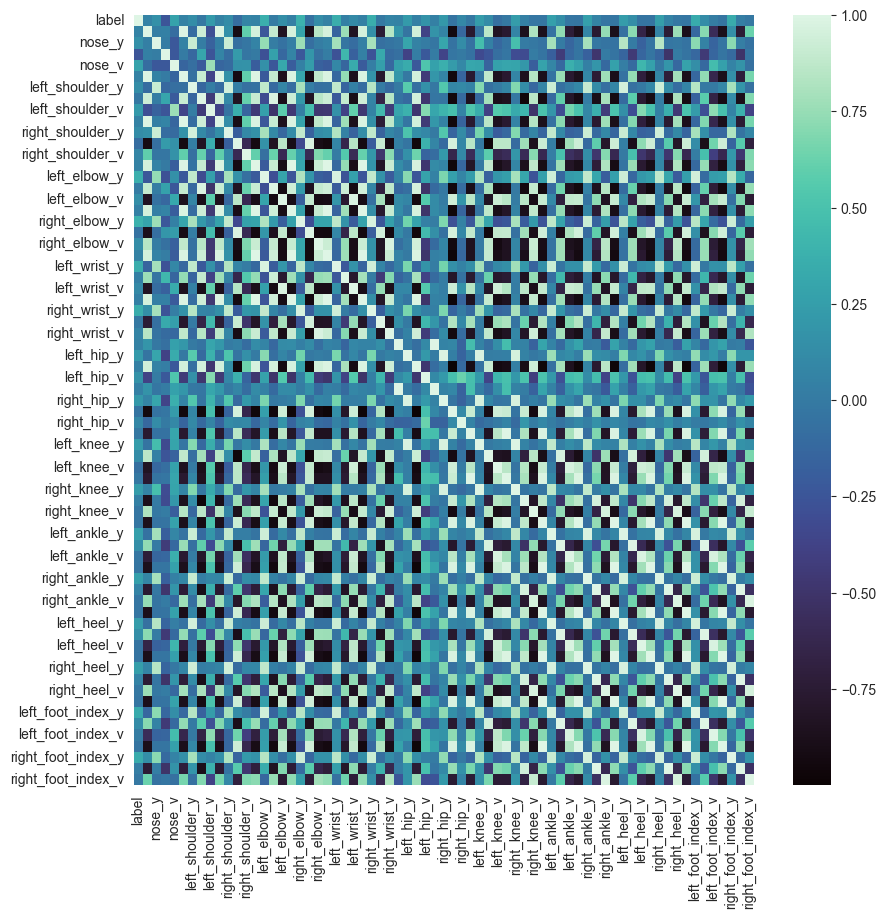

In [6]:
# replacing "H" and "L" values of "label" in the dataset to 0 and "C" values to 1

ds['label'] = ds['label'].replace('H', 0)
ds['label'] = ds['label'].replace('L', 0)
ds['label'] = ds['label'].replace('C', 1)

cm = ds.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, ax=ax, cmap="mako")
plt.show()

In [7]:
ds["label"].value_counts()

label
0    18616
1     9904
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='Count'>

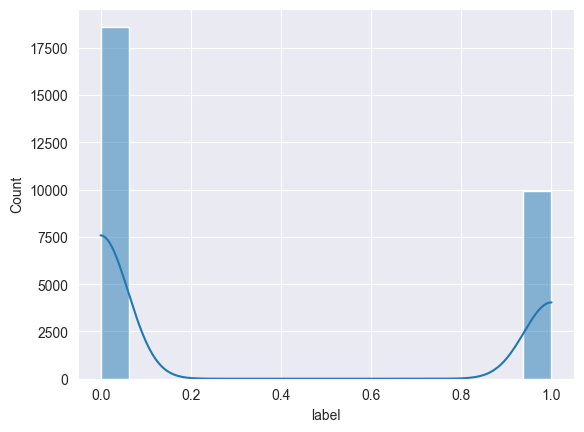

In [8]:
sns.histplot(ds["label"], kde=True)

In [ ]:
sns.pairplot(ds, hue="label")

In [14]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(ds.loc[:, ds.columns != 'label'], ds["label"].values.ravel())

/Users/defeee/Documents/GitHub/FormAI/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred = log_model.predict(ds_test.loc[:, ds_test.columns != 'label'])

Accuracy: 0.8535211267605634


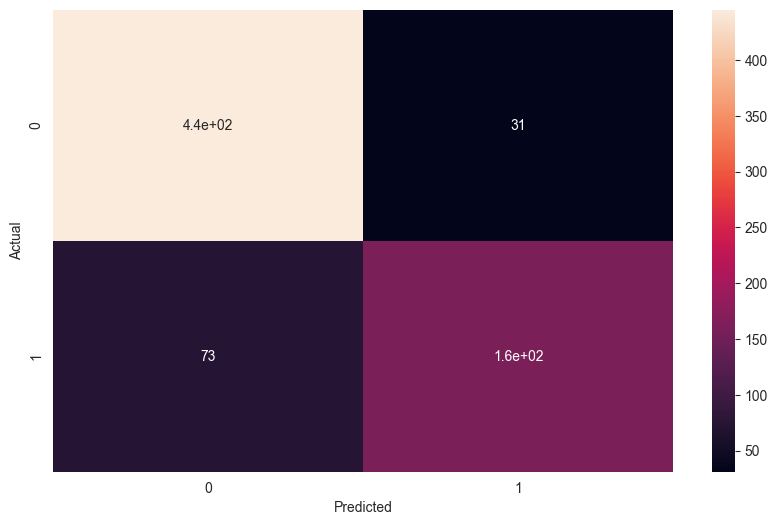

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(ds_test['label'], y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(ds_test['label'], y_pred)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

In [17]:
from sklearn.metrics import classification_report

print(classification_report(ds_test['label'], y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       476
           1       0.84      0.69      0.76       234

    accuracy                           0.85       710
   macro avg       0.85      0.81      0.83       710
weighted avg       0.85      0.85      0.85       710



/Users/defeee/Documents/GitHub/FormAI/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8732394366197183


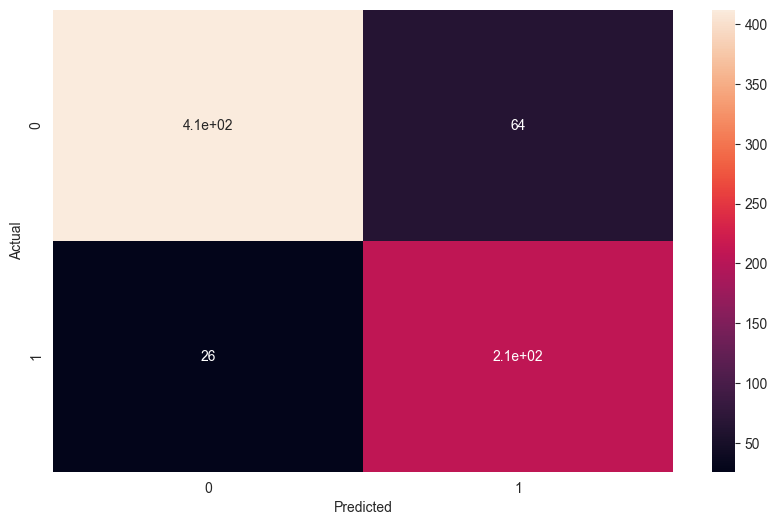

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ("scaler", StandardScaler()), 
    ("logistic", LogisticRegression())
])

pipe.fit(ds.loc[:, ds.columns != 'label'], ds['label'].values.ravel())

y_pred_scale = pipe.predict(ds_test.loc[:, ds_test.columns != 'label'])

accuracy = accuracy_score(ds_test['label'], y_pred_scale)
cm = confusion_matrix(ds_test['label'], y_pred_scale)

print("Accuracy:", accuracy)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

In [19]:
print("Coefficients:", log_model.coef_)
print("Intercept:", log_model.intercept_)

Coefficients: [[  0.85772751  -2.48594254  -6.71234607  -3.84233581  -0.41656576
   -7.47664935  -7.02943253  -2.94567051   3.32298225 -17.70567685
   -2.88070875  -4.58681826  -1.29152003  14.83639582  -0.45520668
   12.37031353   1.30996365   5.47434435  -2.71975975  14.93389493
    0.32608742  14.76932888   2.79805325   7.77190559  -0.27228519
    5.96105482   5.73483945  -7.51452358   1.37199749   3.19183953
    0.38310011  -4.35509705   2.92998621  -5.00252909  -0.35085429
   -4.71691961  -2.06059515  -3.26090143   0.85446686 -14.1487537
    0.47112778  -7.05460663   5.25978726 -12.64892033  -0.18968528
    0.38228966   3.28569666  -0.83924417  -2.3499289   -1.40611987
    3.52997964   2.62932691   1.82029291   2.60080271   2.73301619
   -4.17658436  -2.00828521   1.14621188   2.22010008   5.57257623
   -1.58091568   7.30956034  -3.94532247   6.11097375  -1.15154945
    3.93406659  -8.1378422   -1.69311522]]
Intercept: [-7.41884206]


<BarContainer object of 68 artists>

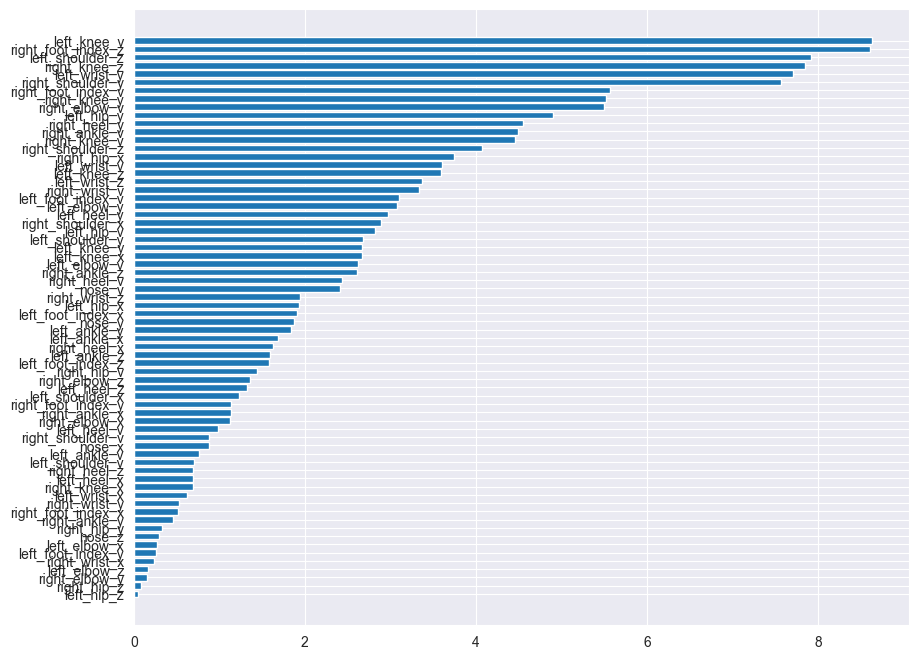

In [20]:
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))

feature_importances = pd.DataFrame(
    {"column": ds.loc[:, ds.columns != 'label'].columns, "coef": np.abs(pipe.named_steps["logistic"].coef_[0])}
).sort_values(by="coef", ascending=True)

ax.barh(feature_importances["column"], feature_importances["coef"])

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "logistic__C": [0.1, 1, 10, 100, 1000],
    "logistic__penalty": ["l1", "l2"]
}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(ds.loc[:, ds.columns != 'label'], ds['label'].values.ravel())

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)



/Users/defeee/Documents/GitHub/FormAI/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/defeee/Documents/GitHub/FormAI/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

KeyboardInterrupt: 